In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plot
import seaborn as sns

**Data Exploration**

In [126]:
dataframe = pd.read_csv('audi.csv')
dataframe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [127]:
dataframe.shape

(10668, 9)

In [128]:
dataframe.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [129]:
dataframe.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [130]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


Through the **.info()** function we have found the categorical values that we will have to encode at a later stage

In [131]:
dataframe['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [132]:
dataframe['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [133]:
dataframe['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

<AxesSubplot:>

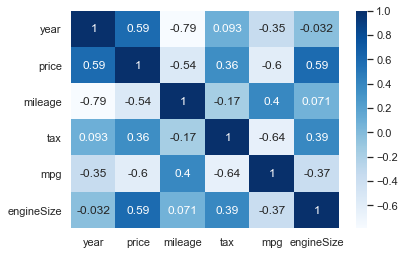

In [134]:
sns.heatmap(dataframe.corr(),cmap="Blues",annot=True)

From the heatmap we can infer that *Year*,*Price* & *Engine Size* are positively correlated i.e the older the car the lower it's resale value

In [135]:
dataframe.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

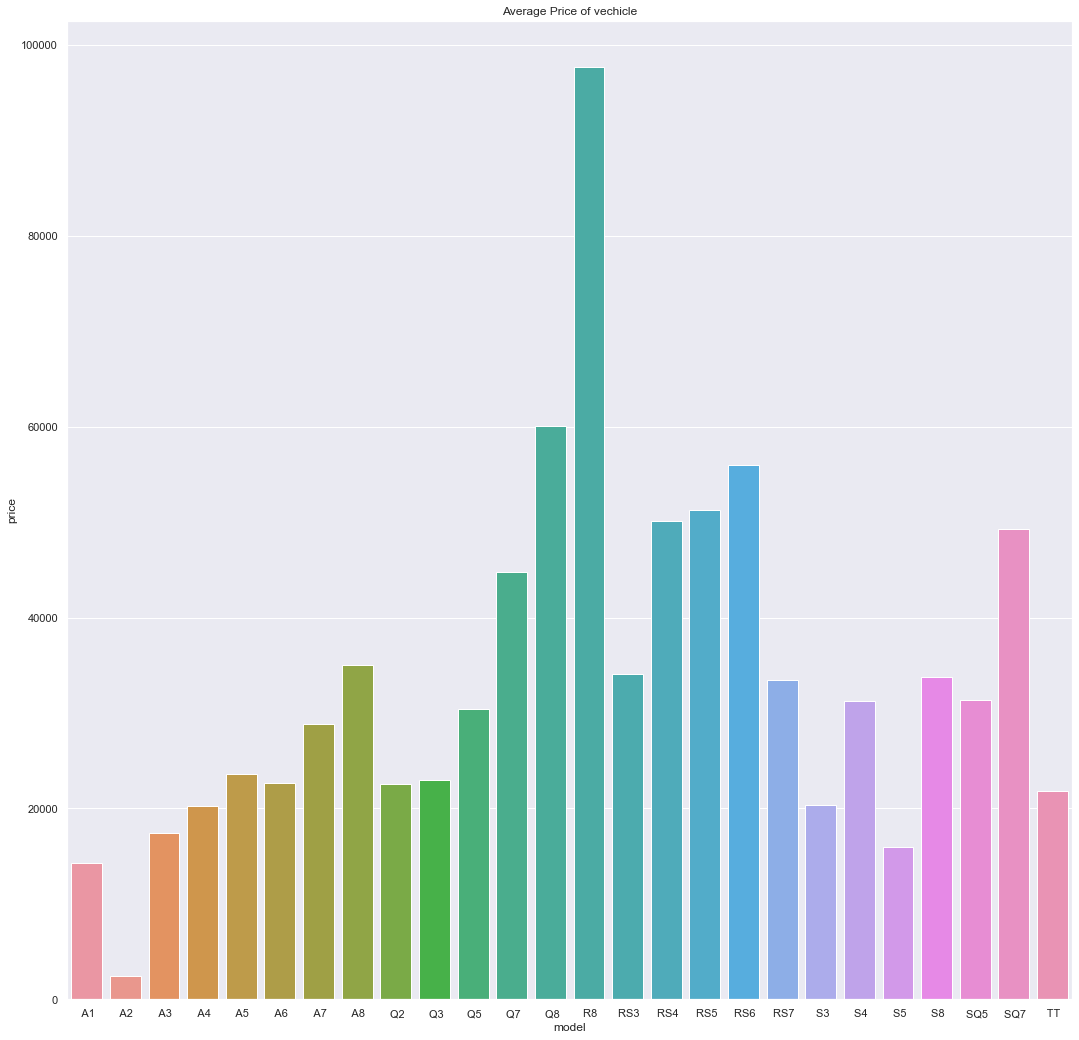

In [136]:
# Checking the price by model
plt.subplots(figsize=(18,18))
price_by_model = dataframe.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="model", y ="price", data = price_by_model)
plt.show()

In [137]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

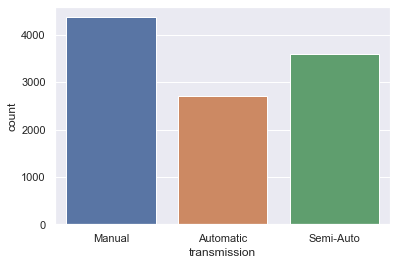

In [138]:
sns.countplot(dataframe["transmission"])

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

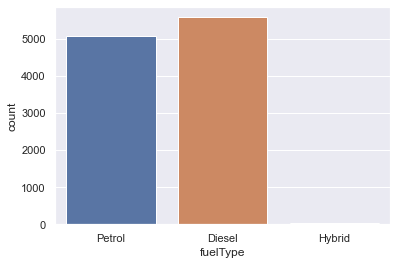

In [139]:
sns.countplot(dataframe["fuelType"])

In [140]:
dataset1= dataframe[["price", "mileage", "mpg", "tax"]]
Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1> (Q3 + 1.5 * IQR))).sum()

price       443
mileage     324
mpg          33
tax        3287
dtype: int64

In [141]:
df =pd.get_dummies(dataframe, columns=['transmission','fuelType'])

In [142]:
df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,A1,2017,12500,15735,150,55.4,1.4,0,1,0,0,0,1
1,A6,2016,16500,36203,20,64.2,2.0,1,0,0,1,0,0
2,A1,2016,11000,29946,30,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,25952,145,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,1998,145,49.6,1.0,0,1,0,0,0,1


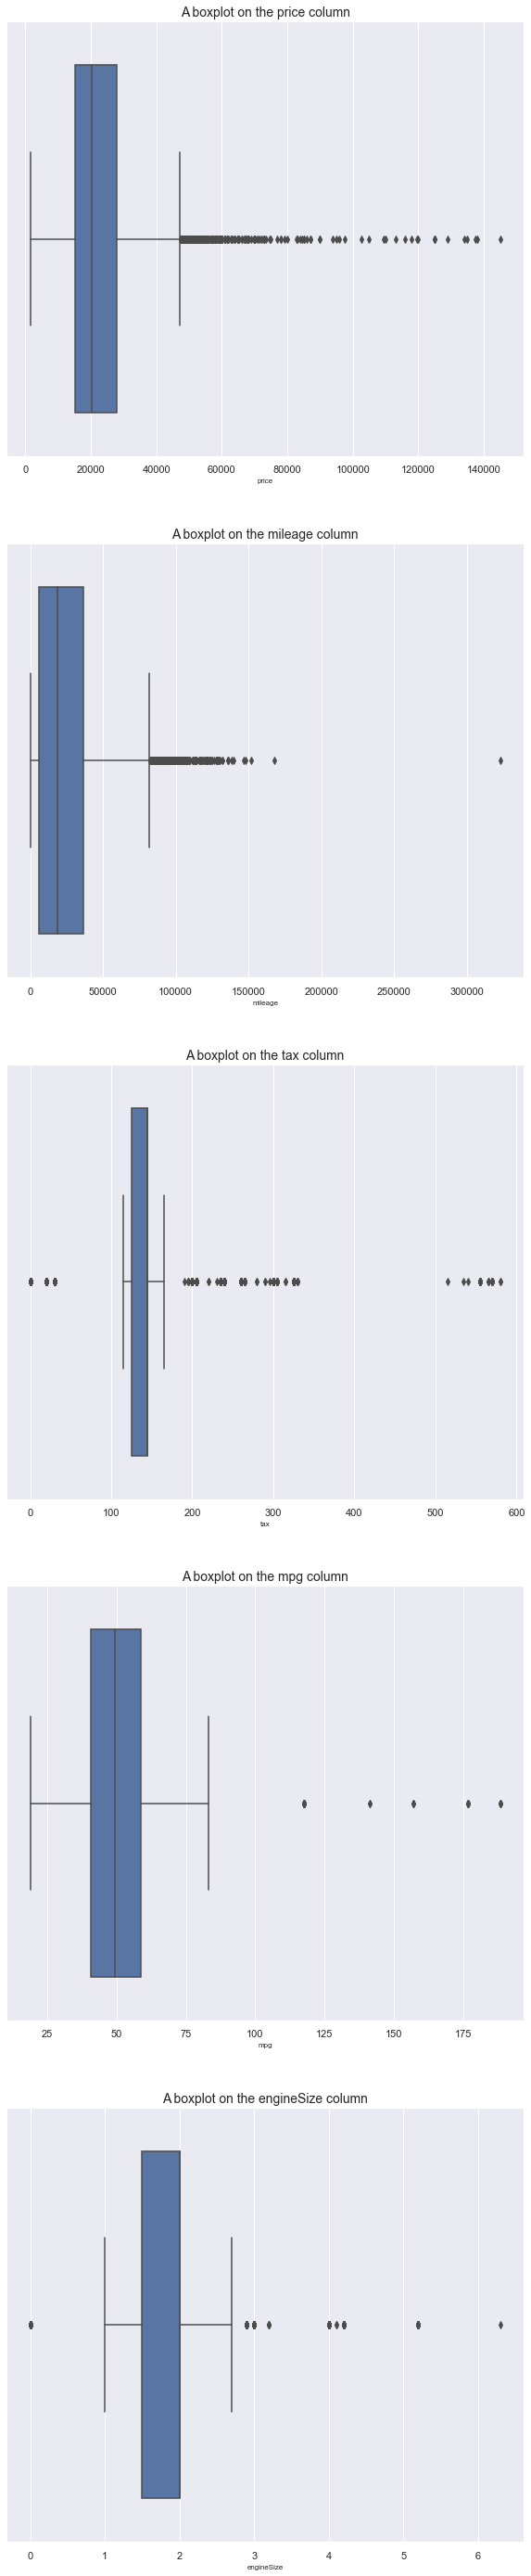

In [143]:
#outliers boxplot
col_names = ["price", "mileage", "tax", "mpg", "engineSize"]
fig, ax = plot.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plot.show()

In [144]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()

<ipython-input-144-0fbe00ed1e73>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()
<ipython-input-144-0fbe00ed1e73>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).sum()


engineSize                1465
fuelType_Diesel              0
fuelType_Hybrid             28
fuelType_Petrol              0
mileage                    324
model                        0
mpg                         33
price                      443
tax                       3287
transmission_Automatic       0
transmission_Manual          0
transmission_Semi-Auto       0
year                       170
dtype: int64

Since Tax seems to have a lot of outliers we will drop tax

In [145]:
df= df.drop(['tax'],axis=1)

In [146]:
df.head()

,model,year,price,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,A1,2017,12500,15735,55.4,1.4,0,1,0,0,0,1
1,A6,2016,16500,36203,64.2,2.0,1,0,0,1,0,0
2,A1,2016,11000,29946,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,25952,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,1998,49.6,1.0,0,1,0,0,0,1


In [147]:
df.columns

Index(['model', 'year', 'price', 'mileage', 'mpg', 'engineSize',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [206]:
df=df.drop(['model'],axis=1)

To see if feature scaling improves the accuracy of our model or not we will try running the algorithms without a feature scaler once and once with StandardScaler and once with MinMax

In [207]:
from sklearn.preprocessing import MinMaxScaler

Minmaxdf= MinMaxScaler().fit_transform(df)


In [217]:
Minmaxdf=pd.DataFrame(Minmaxdf, columns = df.columns)

In [219]:
from sklearn.preprocessing import StandardScaler

Stdscalerdf  = StandardScaler().fit_transform(df)


In [220]:
Stdscalerdf=pd.DataFrame(Stdscalerdf, columns = df.columns)

In [221]:
X= df.drop(['price'],axis=1)
Y = df['price']

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

MinMax Scaler

In [223]:
X_mtrain,X_mtest,Y_mtrain,Y_mtest = train_test_split(Minmaxdf.drop(columns = ['price']),Minmaxdf[['price']],train_size = 0.7, random_state = 0)

Standard Scaler

In [224]:
X_strain,X_stest,Y_strain,Y_stest = train_test_split(Stdscalerdf.drop(columns = ['price']),Stdscalerdf[['price']],train_size=0.7,random_state=100)

In [225]:
X_train.head()

,year,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
5936,2017,33200,55.4,2.0,0,0,1,1,0,0
7512,2018,14500,54.3,1.4,0,1,0,0,0,1
10440,2015,45669,60.1,1.4,1,0,0,0,0,1
9487,2020,94,40.4,2.0,1,0,0,0,0,1
9456,2017,11570,55.4,1.4,0,1,0,0,0,1


In [226]:
Y_train.head()

5936     22500
7512     17444
10440    13000
9487     27995
9456     12990
Name: price, dtype: int64

In [227]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet


Linear Regression

In [228]:
linreg = LinearRegression().fit(X_train,Y_train)
accuracy = linreg.score(X_test,Y_test)*100
accuracy

77.55612360161552

In [232]:
linreg = LinearRegression().fit(X_mtrain,Y_mtrain)
accuracy = linreg.score(X_mtest,Y_mtest)*100
accuracy

80.4044743498372

In [233]:
linreg = LinearRegression().fit(X_strain,Y_strain)
accuracy = linreg.score(X_stest,Y_stest)*100
accuracy

77.5572986804221

Elastic Net

In [229]:
elnet = ElasticNet(random_state=0).fit(X_train,Y_train)
accuracy = elnet.score(X_test,Y_test)*100
accuracy

66.80482263866342

In [234]:
elnet = ElasticNet(random_state=0).fit(X_mtrain,Y_mtrain)
accuracy = elnet.score(X_mtest,Y_mtest)*100
accuracy

-0.005964147248893603

In [235]:
elnet = ElasticNet(random_state=0).fit(X_mtrain,Y_mtrain)
accuracy = elnet.score(X_stest,Y_stest)*100
accuracy

-3.0770563030254605

Ridge Regression

In [230]:
rid =Ridge(alpha=1.0).fit(X_train,Y_train)
accuracy = rid.score(X_test,Y_test)*100
accuracy

77.55206699823644

In [237]:
rid =Ridge(alpha=1.0).fit(X_mtrain,Y_mtrain)
accuracy = rid.score(X_mtest,Y_mtest)*100
accuracy

80.42153594176949

In [236]:
rid =Ridge(alpha=1.0).fit(X_strain,Y_strain)
accuracy = rid.score(X_stest,Y_stest)*100
accuracy

77.55565792887217

Lasso Regression

In [231]:
lass=Lasso(alpha=0.1).fit(X_train,Y_train)
accuracy = lass.score(X_test,Y_test)*100
accuracy

77.55613525207518

In [238]:
lass=Lasso(alpha=0.1).fit(X_mtrain,Y_mtrain)
accuracy = lass.score(X_mtest,Y_mtest)*100
accuracy

-0.005964147248893603

In [239]:
lass=Lasso(alpha=0.1).fit(X_strain,Y_strain)
accuracy = lass.score(X_stest,Y_stest)*100
accuracy

73.72254558952748